## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1
Downloading dataset 
and drop column "Номер варианта" because we do not need it for any data observations.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnikaJha/Sas_hw/main/HW1_var_11.csv', sep=';')

In [ ]:
df = df.drop(columns=['Номер варианта'])
df.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000011,Поступление зарплаты на счет,Другое,0,0.33,женский,0,0,высшее,вспомогательный персонал,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000031,Форма банка (без печати работодателя),Лечение,1,0.49,женский,0,0,среднее-специальное,вспомогательный персонал,...,1.0,17.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000051,2НДФЛ,Другое,1,0.59,женский,0,0,среднее-специальное,вспомогательный персонал,...,1.0,18.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000071,Поступление зарплаты на счет,Покупка автомобиля,1,0.36,мужской,0,0,высшее,специалист,...,1.0,32.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000091,Свободная форма с печатью работодателя,Ремонт,1,0.53,женский,0,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Short info about the dataset:

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Columns: 43 entries, ID to ninety_vintage
dtypes: float64(30), int64(4), object(9)
memory usage: 3.4+ MB


Let's investigate the distributions according to the data now and call new table as **Table 1**.

In [ ]:
unique = []
zeros = []
nans = []
for i in df.columns:
  unique.append(df[i].nunique())
  zeros.append(df[i].isin([0]).sum())
  nans.append(df[i].isna().sum())

per_unique = unique / df.nunique().sum() * 100
per_unique = per_unique.round(decimals=2)

per_zeros = zeros / df.isin([0]).sum().sum() * 100
per_zeros = per_zeros.round(decimals=2)

per_nan = nans / df.isna().sum().sum() * 100
per_nan = per_nan.round(decimals=2)

In [ ]:
table_1= pd.DataFrame()
table_1['VARIABLE'] = df.columns
table_1['UNIQUE'] = unique
table_1['PERCENT_UNIQUE'] = per_unique
table_1['ZEROS'] = zeros
table_1['PERCENT_ZEROS'] = per_zeros
table_1['NANS'] = nans
table_1['PERCENT_NANS'] = per_nan
table_1[1:]

,VARIABLE,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS
1,INCOME_BASE_TYPE,4,0.03,0,0.00,61,0.03
2,CREDIT_PURPOSE,10,0.08,0,0.00,0,0.00
3,INSURANCE_FLAG,2,0.02,3975,5.16,0,0.00
4,DTI,60,0.47,2,0.00,122,0.06
5,SEX,2,0.02,0,0.00,0,0.00
6,FULL_AGE_CHILD_NUMBER,6,0.05,6073,7.88,0,0.00
7,DEPENDANT_NUMBER,4,0.03,10214,13.26,0,0.00
8,EDUCATION,9,0.07,0,0.00,0,0.00
9,EMPL_TYPE,9,0.07,0,0.00,2,0.00
10,EMPL_SIZE,8,0.06,0,0.00,118,0.06


Let's look at the statistical parameters of the initial data and call this **Table 2**:

In [ ]:
display(df[df.columns[1:]].describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
INCOME_BASE_TYPE,10181,4,2НДФЛ,3298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_PURPOSE,10242,10,Ремонт,5645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSURANCE_FLAG,10242.0,NaN,NaN,NaN,0.611892,0.487343,0.0,0.0,1.0,1.0,1.0
DTI,10120.0,NaN,NaN,NaN,0.387964,0.136878,0.0,0.28,0.4,0.49,0.59
SEX,10242,2,мужской,5684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FULL_AGE_CHILD_NUMBER,10242.0,NaN,NaN,NaN,0.559852,0.774799,0.0,0.0,0.0,1.0,5.0
DEPENDANT_NUMBER,10242.0,NaN,NaN,NaN,0.003613,0.074517,0.0,0.0,0.0,0.0,3.0
EDUCATION,10242,9,высшее,5823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMPL_TYPE,10240,9,специалист,3660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMPL_SIZE,10124,8,>250,6326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. From the Table 1 we see that there is a lot of NaN data that does not really makes sense (we cannot make any conclusions using such data), so we can clean the data by dropping those rows where the most of the significant variables in a row are NaNs.

In [ ]:
df1 = df.dropna(thresh=17,axis = 0)
df1= df1.drop(columns='ID')
df1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4062 entries, 1 to 10241
Columns: 42 entries, INCOME_BASE_TYPE to ninety_vintage
dtypes: float64(30), int64(3), object(9)
memory usage: 1.3+ MB


Now we got 4062 rows of data instead of 10242, but more meaningful and more accurate, however we still have a lot of missing data that we can fill in later.

2. From Table 2 we can see that *min*-function of the variables *min_MnthAfterLoan	and max_MnthAfterLoan*	gives **result `-1`** which may also indicate about incorrect data, beacuse there cannot be negative number motnhs.
3. From Table 2 we can make conclusions that the most frequent purpose of taking credit is repairing and most people in the dataset have higher education.


In [ ]:
# improving the incorrect data
df1['min_MnthAfterLoan'].replace([-1], 0, inplace=True)
df1['max_MnthAfterLoan'].replace([-1], 0, inplace=True)

Now, let's separate the dataset on numerical and categorical parts.

## 2

In [ ]:
data_num = df1.select_dtypes(['float64', 'int64'])
data_num = data_num.astype(float)
data_categorical = df1.select_dtypes(['object'])

And fill in the missed data by mean data in the numerical part and by 'Other' in categorical, becuase this is the best way not to mess up with the initial data.

In [ ]:
mean_num = data_num.mean()
mean_categorical = 'Другое'

for i in range (data_num.shape[1]):
  data_num.fillna({data_num.columns[i]: mean_num[i]}, inplace=True)

for i in range (data_categorical.shape[1]):
  data_categorical.fillna({data_categorical.columns[i]: mean_categorical}, inplace=True)

In [ ]:
display(data_categorical.isna().sum()) #number of NaNs in the new data

INCOME_BASE_TYPE    0
CREDIT_PURPOSE      0
SEX                 0
EDUCATION           0
EMPL_TYPE           0
EMPL_SIZE           0
EMPL_PROPERTY       0
EMPL_FORM           0
FAMILY_STATUS       0
dtype: int64

In [ ]:
display(data_num.isna().sum()) #number of NaNs in the new data

INSURANCE_FLAG           0
DTI                      0
FULL_AGE_CHILD_NUMBER    0
DEPENDANT_NUMBER         0
BANKACCOUNT_FLAG         0
Period_at_work           0
age                      0
max90days                0
max60days                0
max30days                0
max21days                0
max14days                0
avg_num_delay            0
if_zalog                 0
num_AccountActive180     0
num_AccountActive90      0
num_AccountActive60      0
Active_to_All_prc        0
numAccountActiveAll      0
numAccountClosed         0
sum_of_paym_months       0
all_credits              0
Active_not_cc            0
own_closed               0
min_MnthAfterLoan        0
max_MnthAfterLoan        0
dlq_exist                0
thirty_in_a_year         0
sixty_in_a_year          0
ninety_in_a_year         0
thirty_vintage           0
sixty_vintage            0
ninety_vintage           0
dtype: int64

In [ ]:
data_categorical['EMPL_SIZE'].replace(['*n.a.*'], 'other', inplace=True)
data_categorical['EDUCATION'].replace(['*n.a.*'], 'other', inplace=True)

## 3

In [ ]:
table_3 = data_num.describe().round(decimals=2)
table_3.T

,count,mean,std,min,25%,50%,75%,max
INSURANCE_FLAG,4062.0,0.62,0.49,0.0,0.00,1.00,1.00,1.00
DTI,4062.0,0.38,0.14,0.0,0.28,0.40,0.49,0.59
FULL_AGE_CHILD_NUMBER,4062.0,0.54,0.76,0.0,0.00,0.00,1.00,4.00
DEPENDANT_NUMBER,4062.0,0.00,0.06,0.0,0.00,0.00,0.00,2.00
BANKACCOUNT_FLAG,4062.0,0.30,0.78,0.0,0.00,0.00,0.00,3.00
Period_at_work,4062.0,54.94,54.02,6.0,18.00,38.00,74.00,432.00
age,4062.0,35.83,8.55,23.0,29.00,34.00,42.00,63.00
max90days,4062.0,1.67,1.89,0.0,1.00,1.00,2.00,31.00
max60days,4062.0,1.20,1.54,0.0,0.00,1.00,2.00,14.00
max30days,4062.0,0.89,1.29,0.0,0.00,1.00,1.00,12.00


Let's look at the data correlation:

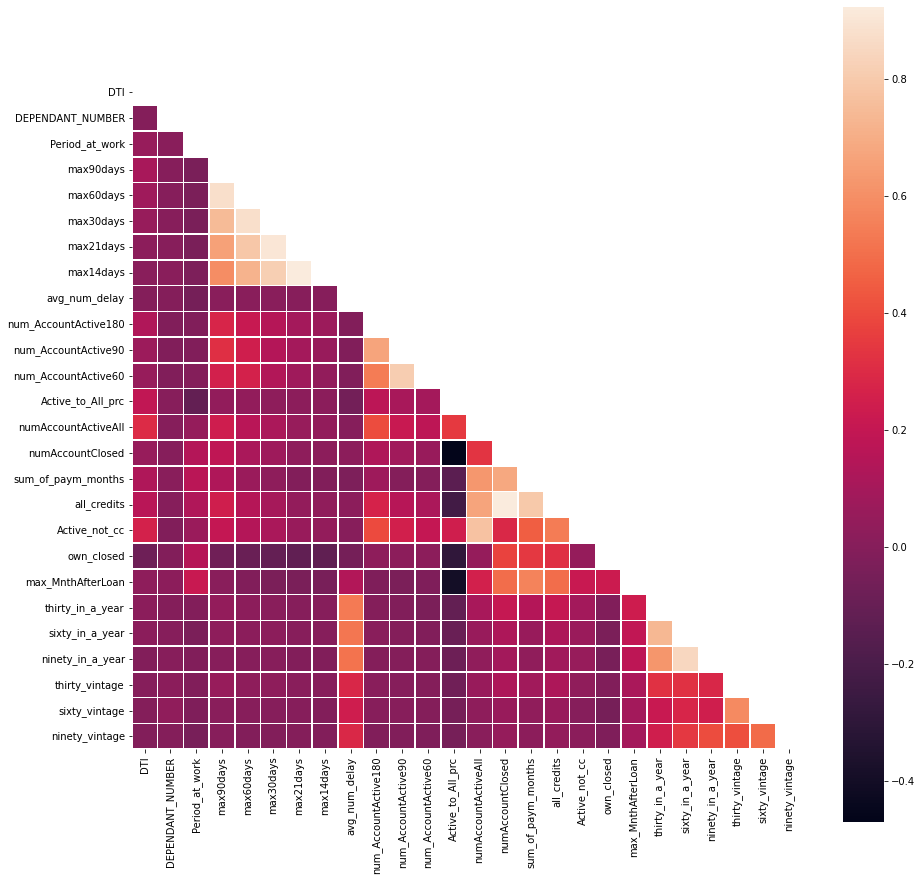

In [ ]:
data_corr = data_num.drop(columns=['age','FULL_AGE_CHILD_NUMBER', 'INSURANCE_FLAG', 'BANKACCOUNT_FLAG', 
                                   'if_zalog', 'min_MnthAfterLoan', 'dlq_exist'])
corr = data_corr.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

corr_graph = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, mask=mask, square =True, linewidths=.5)
corr_graph.figure.set_size_inches(15,15)

From this heatmap we make few conclusions: 

1) variables `maxNdays` (N=90,60,30,21,14) are positively strongly correlated with one another which is normal, because these parameters are almost the same/proportionally same; 

2) one more very strong positive correlation gives us parameters `allcredits` and `numAccountsClosed` which is very interesting, because the correlation between `allcredits` and `numAccountActiveAll` is much weaker same as with the parameter `own_closed`. That means there is some strong pattern between the number of closed acoounts with overall number of credits person has.

3) observing negative correaltions, we can point out `Active_to_All_prc` with `max_MnthAfterLoan` and with `numAccountsClosed`. That are also curios patterns becuase it means they are are inversely proportional and also dependent.

In [ ]:
n = data_num.shape[1]
m = data_categorical.shape[1]
print(n, m)

33 9


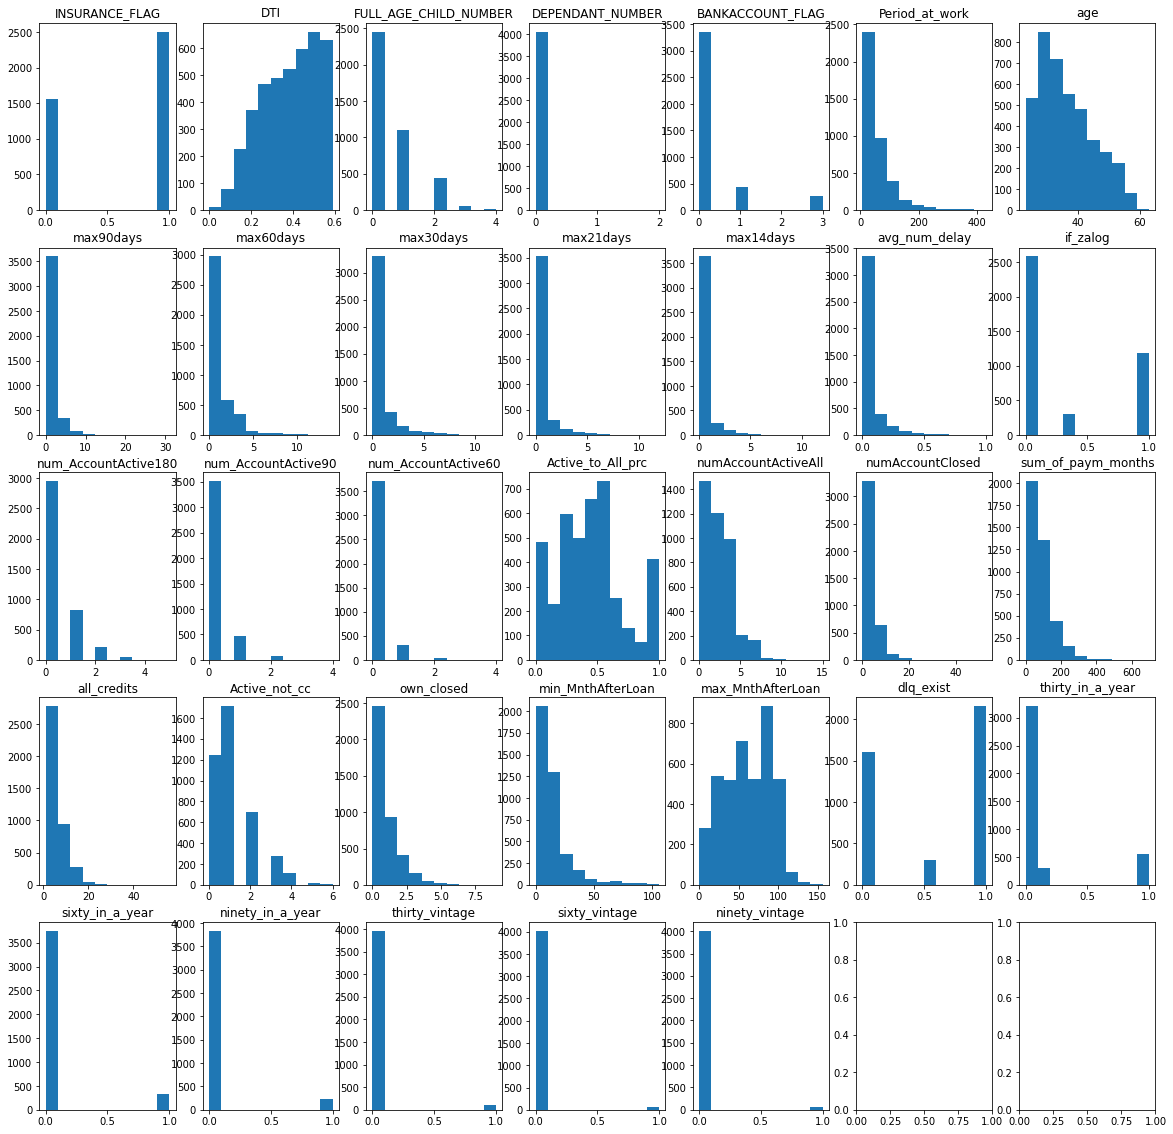

In [ ]:
fig, axs = plt.subplots(5, 7)
fig.set_size_inches(20,20)
ind = 0
col = data_num.columns
for i in range(5):
  for j in range(7):
    if (i == 4 and (j == 5 or j == 6)): break
    axs[i, j].hist(data_num[col[ind]])
    axs[i, j].set_title(col[ind])
    ind += 1


Let's point out the most interesting histograms of the numarical data:

1) `DTI`, of course, one of them, it shows that debt-to-income ratio from 500 to about 600 is the most common

2) `FULL_AGE_CHILD_NUMBER` histogram probably shows us that people mostly have no children or have babies under a year.

3) Mostly it's people in their twenties and a bit older.

4) Time spent on work is really insingificant and mostly less than 100 days.

In [ ]:
data_categorical['INCOME_BASE_TYPE'].replace(['Поступление зарплаты на счет'], 'З/п на счет', inplace=True)
data_categorical['INCOME_BASE_TYPE'].replace(['Форма банка (без печати работодателя)'], 'Форма банка', inplace=True)
data_categorical['INCOME_BASE_TYPE'].replace(['Свободная форма с печатью работодателя'], 'Форма с печатью р-ля', inplace=True)
data_categorical['CREDIT_PURPOSE'].replace(['Покупка недвижимости/ строительство'], 'Покупка недви-ти/ стр-во', inplace=True)

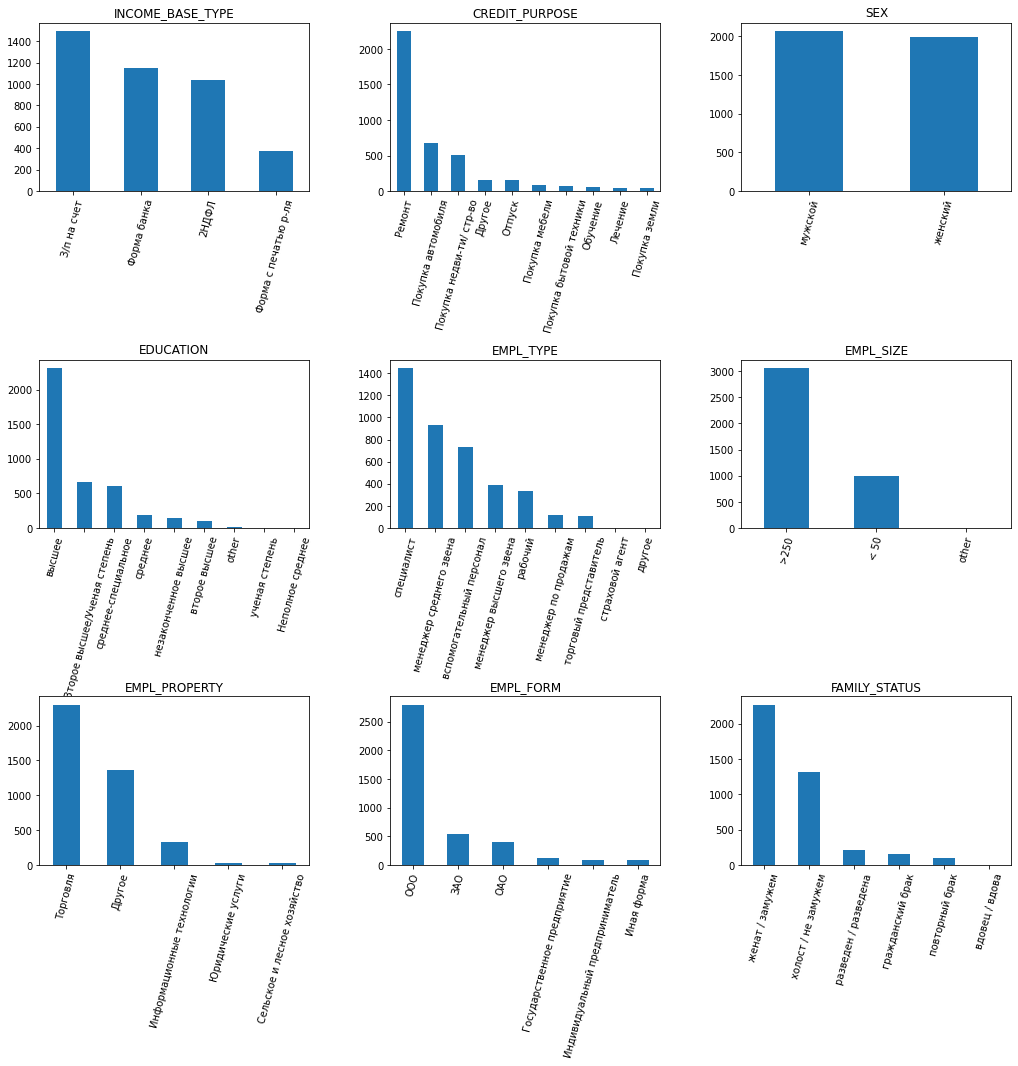

In [ ]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(15,13)
col = data_categorical.columns
ind = 0
for i in range(3):
  for j in range(3):
    data_categorical[col[ind]].value_counts().plot(kind='bar', ax=ax[i, j]).set_title(col[ind])
    ind += 1
for axis in ax:
  for x in axis:
    x.tick_params(axis='x', rotation=75)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0.3, hspace=1)


Almost all histograms (except for `SEX`) are positively skewed and pretty clear without explanations, but noticiable fact is that there are almost equal number of women and men in the dataset.

In [ ]:
final_data= pd.concat([data_categorical,data_num], axis = 1, join="inner")
final_data.to_csv('hw1_var11_final.csv')
final_data.head()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,SEX,EDUCATION,EMPL_TYPE,EMPL_SIZE,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,INSURANCE_FLAG,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
1,Форма банка,Лечение,женский,среднее-специальное,вспомогательный персонал,>250,Торговля,ЗАО,холост / не замужем,1.0,...,1.000000,17.000000,43.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
2,2НДФЛ,Другое,женский,среднее-специальное,вспомогательный персонал,>250,Торговля,ООО,холост / не замужем,1.0,...,1.000000,18.000000,89.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
3,З/п на счет,Покупка автомобиля,мужской,высшее,специалист,>250,Информационные технологии,ООО,холост / не замужем,1.0,...,1.000000,32.000000,32.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
7,З/п на счет,Ремонт,мужской,высшее,специалист,>250,Торговля,ООО,женат / замужем,1.0,...,0.713526,13.734255,61.729737,0.573479,0.14802,0.08557,0.063247,0.030295,0.014085,0.017008
13,З/п на счет,Покупка недви-ти/ стр-во,мужской,высшее,менеджер среднего звена,>250,Торговля,ЗАО,холост / не замужем,1.0,...,3.000000,3.000000,28.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
